In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Stars_preprocessed.csv")
data.head()

,Unnamed: 0,Vmag,Plx,e_Plx,B_V,SpType,Type,Amag
0,0,9.10,3.54,1.39,0.482,F5,0,16.845016
1,1,9.27,21.90,3.10,0.999,K3V,0,20.972221
2,2,6.61,2.81,0.63,-0.019,B9,0,13.853532
3,3,8.06,7.75,0.97,0.370,F0V,0,17.506509
4,4,8.55,2.87,1.11,0.902,G8III,1,15.839409


In [3]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
data.head()

,Vmag,Plx,e_Plx,B_V,SpType,Type,Amag
0,9.10,3.54,1.39,0.482,F5,0,16.845016
1,9.27,21.90,3.10,0.999,K3V,0,20.972221
2,6.61,2.81,0.63,-0.019,B9,0,13.853532
3,8.06,7.75,0.97,0.370,F0V,0,17.506509
4,8.55,2.87,1.11,0.902,G8III,1,15.839409


In [5]:
print(len(data.loc[data['Type'] == 0]))
print(len(data.loc[data['Type'] == 1]))

7650
1750


In [6]:
zero_indices = data.index[data['Type'] == 0]
data.drop(zero_indices[:int(len(zero_indices) * 0.77)],inplace=True)

In [7]:
print(len(data.loc[data['Type'] == 0]))
print(len(data.loc[data['Type'] == 1]))

1760
1750


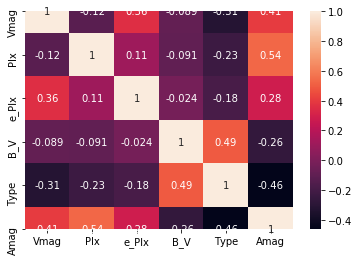

In [8]:
corr = data.corr()
sns.heatmap(corr,annot=True)

In [9]:
X = data.drop(["Type","SpType"],axis=1).to_numpy()
y = data["Type"].to_numpy()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [11]:
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score

def model_fit_score(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    dif = (y_pred,y_test)
    acc = accuracy_score(*dif)
    r2 = r2_score(*dif)
    recall = recall_score(*dif)
    precision = precision_score(*dif)
    print("accuracy_score: ", acc)
    print("r2_score: ", r2)
    print("recall_score", recall)
    print("precision_score: ", precision)
    return [acc, r2, recall, precision]

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 0.001, 'preprocessing': StandardScaler()}

In [23]:
from sklearn.metrics import accuracy_score
pipe_log_reg = Pipeline([('scaler', StandardScaler()), ('LogisticRegression', LogisticRegression(C=0.001))])
Log_score = model_fit_score(pipe_log_reg)

accuracy_score:  0.8108262108262109
r2_score:  0.23956962976884044
recall_score 0.777422790202343
precision_score:  0.8558030480656507


In [21]:
from sklearn import tree

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', tree.DecisionTreeClassifier())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__splitter': ["best","random"],
            'classifier__max_depth' : [None, 2, 4, 8, 16]
}

grid_tree = GridSearchCV(pipe, param_grid, return_train_score=True)

grid_tree.fit(X_train, y_train)
grid_tree.best_params_

{'classifier__max_depth': 2,
 'classifier__splitter': 'best',
 'preprocessing': StandardScaler()}

In [22]:
pipe_tree = Pipeline([('scaler', StandardScaler()), ('DecisionTree', tree.DecisionTreeClassifier(max_depth=2,splitter='best'))])
tree_score = model_fit_score(pipe_tree)

accuracy_score:  0.8074074074074075
r2_score:  0.2096553708899921
recall_score 0.7531956735496559
precision_score:  0.8980070339976554


In [209]:
from sklearn.svm import SVC
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipe, param_grid, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 10,
 'classifier__gamma': 0.1,
 'preprocessing': StandardScaler()}

In [24]:
from sklearn.svm import SVC
pipe_SVC = Pipeline([('scaler', StandardScaler()), ('svc', SVC(C=10,gamma=0.1))])
SVC_score = model_fit_score(pipe_SVC)

accuracy_score:  0.8210826210826211
r2_score:  0.2673734086340578
recall_score 0.7665677546983185
precision_score:  0.9085580304806565


In [29]:
X_simple = data[["B_V","Amag"]].to_numpy()
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, train_size=0.5)
scaler = StandardScaler()
X_train_simple = scaler.fit_transform(X_train_simple)
X_test_simple = scaler.transform(X_test_simple)
X_simple = scaler.transform(X_simple)

In [37]:
model = LogisticRegression(C=0.01)
model.fit(X_train_simple, y_train_simple)
y_pred = model.predict(X_test_simple)
print(accuracy_score(y_test_simple,y_pred))

0.81994301994302


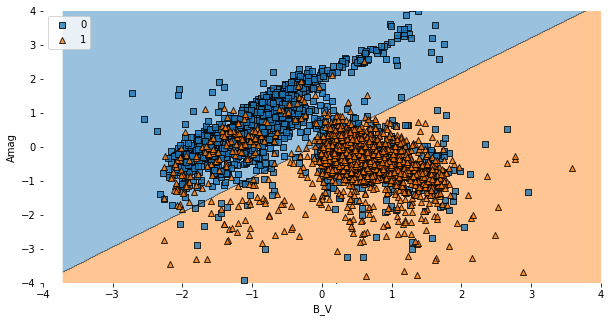

In [38]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10, 5))
plot_decision_regions(X_simple, y, model)
plt.xlabel('B_V')
plt.ylabel('Amag')
plt.legend(loc='upper left')
plt.axis([-4, 4, -4, 4])
plt.show()


In [34]:
model = tree.DecisionTreeClassifier(max_depth=2,splitter='best')
model.fit(X_train_simple, y_train_simple)
y_pred = model.predict(X_test_simple)
print(accuracy_score(y_test_simple,y_pred))

0.8250712250712251


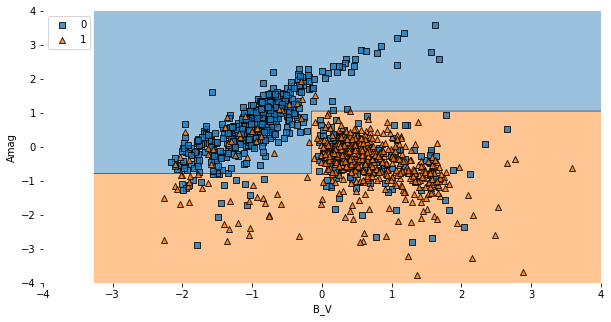

In [36]:
plt.figure(figsize=(10, 5))
plot_decision_regions(X_simple[::3], y[::3], model)
plt.xlabel('B_V')
plt.ylabel('Amag')
plt.legend(loc='upper left')
plt.axis([-4, 4, -4, 4])
plt.show()

In [30]:
model = SVC(C=100,gamma=0.1)
model.fit(X_train_simple, y_train_simple)
y_pred = model.predict(X_test_simple)
print(accuracy_score(y_test_simple,y_pred))

0.8250712250712251


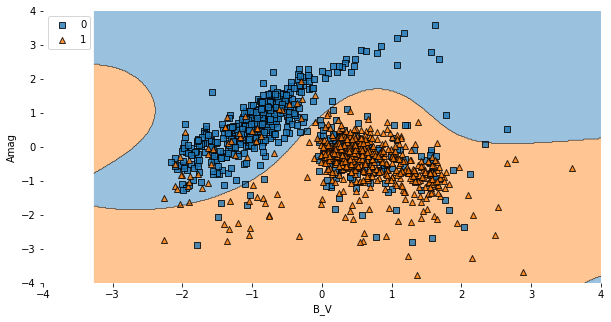

In [31]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10, 5))
plot_decision_regions(X_simple[::3], y[::3], model)
plt.xlabel('B_V')
plt.ylabel('Amag')
plt.legend(loc='upper left')
plt.axis([-4, 4, -4, 4])
plt.show()

In [39]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier((40,40,40))
model.fit(X_train_simple, y_train_simple)
y_pred = model.predict(X_test_simple)
print(accuracy_score(y_test_simple,y_pred))

0.8262108262108262


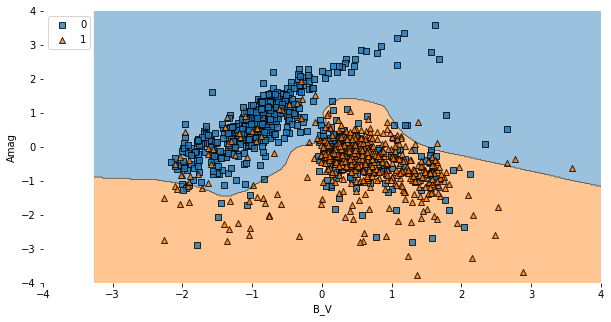

In [40]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10, 5))
plot_decision_regions(X_simple[::3], y[::3], model)
plt.xlabel('B_V')
plt.ylabel('Amag')
plt.legend(loc='upper left')
plt.axis([-4, 4, -4, 4])
plt.show()

In [216]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [217]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [221]:
from keras import Sequential
from keras.layers import Flatten, Dense, BatchNormalization, Dropout, Activation

model = Sequential()
model.add(Flatten(input_shape=[X.shape[1]]))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 5)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                384       
_________________________________________________________________
batch_normalization_47 (Batc (None, 64)                256       
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_48 (Batc (None, 128)               512       
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [222]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [223]:
history = model.fit(X_train,y_train, epochs=30, batch_size=16, validation_split=0.1)

Epoch 1/30
99/99 [==============================] - 5s 14ms/step - loss: 0.6537 - accuracy: 0.7242 - val_loss: 0.6175 - val_accuracy: 0.7443
Epoch 2/30
99/99 [==============================] - 1s 6ms/step - loss: 0.4898 - accuracy: 0.8010 - val_loss: 0.5200 - val_accuracy: 0.7955
Epoch 3/30
99/99 [==============================] - 1s 7ms/step - loss: 0.4938 - accuracy: 0.8052 - val_loss: 0.4803 - val_accuracy: 0.8011
Epoch 4/30
99/99 [==============================] - 1s 7ms/step - loss: 0.4872 - accuracy: 0.7734 - val_loss: 0.4990 - val_accuracy: 0.7784
Epoch 5/30
99/99 [==============================] - 1s 7ms/step - loss: 0.4748 - accuracy: 0.7990 - val_loss: 0.4637 - val_accuracy: 0.8068
Epoch 6/30
99/99 [==============================] - 1s 7ms/step - loss: 0.4464 - accuracy: 0.8191 - val_loss: 0.4862 - val_accuracy: 0.8011
Epoch 7/30
99/99 [==============================] - 1s 7ms/step - loss: 0.4514 - accuracy: 0.8001 - val_loss: 0.4694 - val_accuracy: 0.8068
Epoch 8/30
99/99 [=

In [224]:
model.evaluate(X_test,y_test)

55/55 [==============================] - 1s 3ms/step - loss: 0.4185 - accuracy: 0.8365


[0.41851305961608887, 0.8364672660827637]

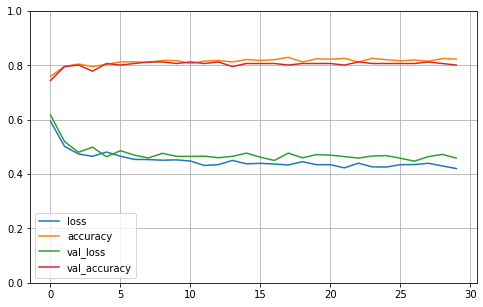

In [225]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [230]:
keras.backend.clear_session()

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[5,]):
    model = keras.models.Sequential()
    model.add(InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation="relu"))
        model.add(BatchNormalization())
    model.add(Dense(2,activation='sigmoid'))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [231]:
keras_class = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)
keras_class

In [232]:
from keras.callbacks import EarlyStopping
keras_class.fit(X_train, y_train, epochs=40, batch_size=16, callbacks=[EarlyStopping(monitor='loss', patience=10, mode='min', verbose=1)])

Epoch 1/40
110/110 [==============================] - 1s 2ms/step - loss: 0.4851 - accuracy: 0.8148
Epoch 2/40
110/110 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.8148
Epoch 3/40
110/110 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8313
Epoch 4/40
110/110 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.8222
Epoch 5/40
110/110 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8359
Epoch 6/40
110/110 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8251
Epoch 7/40
110/110 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.8194
Epoch 8/40
110/110 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8222
Epoch 9/40
110/110 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8234
Epoch 10/40
110/110 [==============================] - 0s 1ms/step - loss: 0.4268 - accuracy: 0.8199

In [233]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [2, 3, 4, 5],
    "n_neurons": [100, 150, 200, 250]
}

rnd_search_cv = RandomizedSearchCV(keras_class, param_distribs, n_iter=3, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)])

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_neurons=100, n_hidden=5 .......................................
Epoch 1/20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


66/66 [==============================] - 2s 6ms/step - loss: 0.4871 - accuracy: 0.8025 - val_loss: 0.5641 - val_accuracy: 0.8205
Epoch 2/20
66/66 [==============================] - 0s 3ms/step - loss: 0.4422 - accuracy: 0.8338 - val_loss: 0.4713 - val_accuracy: 0.8291
Epoch 3/20
66/66 [==============================] - 0s 3ms/step - loss: 0.4429 - accuracy: 0.8291 - val_loss: 0.4926 - val_accuracy: 0.8205
Epoch 4/20
66/66 [==============================] - 0s 3ms/step - loss: 0.4270 - accuracy: 0.8348 - val_loss: 0.4423 - val_accuracy: 0.8291
Epoch 5/20
66/66 [==============================] - 0s 4ms/step - loss: 0.4050 - accuracy: 0.8386 - val_loss: 0.4519 - val_accuracy: 0.8205
Epoch 6/20
66/66 [==============================] - 0s 3ms/step - loss: 0.4049 - accuracy: 0.8414 - val_loss: 0.4420 - val_accuracy: 0.7863
Epoch 7/20
66/66 [==============================] - 0s 3ms/step - loss: 0.4071 - accuracy: 0.8433 - val_loss: 0.4467 - val_accuracy: 0.8291
Epoch 8/20
66/66 [=============

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s


Epoch 1/20
66/66 [==============================] - 2s 7ms/step - loss: 0.5398 - accuracy: 0.7835 - val_loss: 0.5718 - val_accuracy: 0.8205
Epoch 2/20
66/66 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.7949 - val_loss: 0.5384 - val_accuracy: 0.8205
Epoch 3/20
66/66 [==============================] - 0s 3ms/step - loss: 0.4633 - accuracy: 0.8177 - val_loss: 0.4655 - val_accuracy: 0.8205
Epoch 4/20
66/66 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.7996 - val_loss: 0.4547 - val_accuracy: 0.8034
Epoch 5/20
66/66 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.7939 - val_loss: 0.4634 - val_accuracy: 0.8034
Epoch 6/20
66/66 [==============================] - 0s 3ms/step - loss: 0.4378 - accuracy: 0.8158 - val_loss: 0.4333 - val_accuracy: 0.8205
Epoch 7/20
66/66 [==============================] - 0s 3ms/step - loss: 0.4525 - accuracy: 0.8110 - val_loss: 0.4365 - val_accuracy: 0.8205
Epoch 8/20
66/66 [==

66/66 [==============================] - 0s 4ms/step - loss: 0.3858 - accuracy: 0.8424 - val_loss: 0.5049 - val_accuracy: 0.8034
Epoch 17/20
66/66 [==============================] - 0s 4ms/step - loss: 0.4075 - accuracy: 0.8471 - val_loss: 0.4634 - val_accuracy: 0.8205
Epoch 18/20
66/66 [==============================] - 0s 4ms/step - loss: 0.3868 - accuracy: 0.8414 - val_loss: 0.4175 - val_accuracy: 0.8205
Epoch 19/20
66/66 [==============================] - 0s 4ms/step - loss: 0.4036 - accuracy: 0.8424 - val_loss: 0.4282 - val_accuracy: 0.8120
Epoch 20/20
66/66 [==============================] - 0s 4ms/step - loss: 0.4204 - accuracy: 0.8405 - val_loss: 0.4504 - val_accuracy: 0.8034
Epoch 00020: early stopping
19/19 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.7915
[CV] ........................ n_neurons=150, n_hidden=5, total=   7.1s
[CV] n_neurons=150, n_hidden=5 .......................................
Epoch 1/20
66/66 [==============================] 

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min finished


99/99 [==============================] - 2s 5ms/step - loss: 0.5045 - accuracy: 0.7999 - val_loss: 0.5363 - val_accuracy: 0.7727
Epoch 2/20
99/99 [==============================] - 0s 4ms/step - loss: 0.4549 - accuracy: 0.8195 - val_loss: 0.5058 - val_accuracy: 0.7841
Epoch 3/20
99/99 [==============================] - 0s 4ms/step - loss: 0.4549 - accuracy: 0.8151 - val_loss: 0.4814 - val_accuracy: 0.7955
Epoch 4/20
99/99 [==============================] - 0s 4ms/step - loss: 0.4486 - accuracy: 0.8094 - val_loss: 0.4721 - val_accuracy: 0.7841
Epoch 5/20
99/99 [==============================] - 0s 4ms/step - loss: 0.4548 - accuracy: 0.8106 - val_loss: 0.4857 - val_accuracy: 0.8011
Epoch 6/20
99/99 [==============================] - 0s 5ms/step - loss: 0.4217 - accuracy: 0.8125 - val_loss: 0.5074 - val_accuracy: 0.8011
Epoch 7/20
99/99 [==============================] - 0s 4ms/step - loss: 0.4471 - accuracy: 0.8214 - val_loss: 0.4555 - val_accuracy: 0.8011
Epoch 8/20
99/99 [=============

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001ADE9DF6608>,
                   n_iter=3,
                   param_distributions={'n_hidden': [2, 3, 4, 5],
                                        'n_neurons': [100, 150, 200, 250]},
                   verbose=2)

In [234]:
rnd_search_cv.best_params_

{'n_neurons': 150, 'n_hidden': 5}

In [237]:
model = build_model(n_hidden=5, n_neurons=150)
history = model.fit(X_train,y_train, validation_split=0.1, epochs=35)

Epoch 1/35
50/50 [==============================] - 2s 9ms/step - loss: 0.5070 - accuracy: 0.7999 - val_loss: 0.5920 - val_accuracy: 0.8068
Epoch 2/35
50/50 [==============================] - 0s 5ms/step - loss: 0.4359 - accuracy: 0.8157 - val_loss: 0.5633 - val_accuracy: 0.7898
Epoch 3/35
50/50 [==============================] - 0s 5ms/step - loss: 0.4215 - accuracy: 0.8258 - val_loss: 0.5239 - val_accuracy: 0.8125
Epoch 4/35
50/50 [==============================] - 0s 5ms/step - loss: 0.4194 - accuracy: 0.8271 - val_loss: 0.4801 - val_accuracy: 0.8011
Epoch 5/35
50/50 [==============================] - 0s 5ms/step - loss: 0.4238 - accuracy: 0.8265 - val_loss: 0.5012 - val_accuracy: 0.7955
Epoch 6/35
50/50 [==============================] - 0s 5ms/step - loss: 0.4297 - accuracy: 0.8277 - val_loss: 0.4950 - val_accuracy: 0.8068
Epoch 7/35
50/50 [==============================] - 0s 5ms/step - loss: 0.4339 - accuracy: 0.8239 - val_loss: 0.4760 - val_accuracy: 0.7955
Epoch 8/35
50/50 [==

In [238]:
model.evaluate(X_test,y_test)

55/55 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.8325


[0.42407330870628357, 0.8324786424636841]

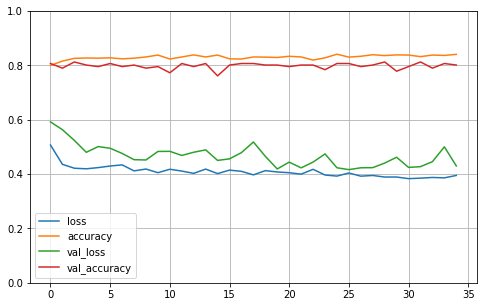

In [239]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [38]:
score_sum = pd.DataFrame(Log_score, index=["accuracy_score","r2_score","recall_score","precision_score"],columns=["Log_reg"])
score_sum["Tree"] = tree_score
score_sum["SVC"] = SVC_score

In [40]:
score_sum

,Log_reg,Tree,SVC
accuracy_score,0.810826,0.807407,0.821083
r2_score,0.239570,0.209655,0.267373
recall_score,0.777423,0.753196,0.766568
precision_score,0.855803,0.898007,0.908558
